## Problem Statement:
### A Grocery Store shared the transactional data with you. Your job is to identify the most popular combos that can be suggested to the Grocery Store chain after a thorough analysis of the most commonly occurring sets of menu items in the customer orders. The Store doesn’t have any combo meals. Can you suggest the best combo meals?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
df = pd.read_csv('E:\GL\Course Content\MRA\Business Project M2\Tejas Padekar - MRA M2\dataset_group.csv')
df 

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


In [3]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [4]:
df.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [6]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [7]:
df.describe(include='object').T

,count,unique,top,freq
Date,20641,603,08-02-2019,183
Product,20641,37,poultry,640


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [9]:
df.duplicated().sum()

4730

In [10]:
df['Date']

0        01-01-2018
1        01-01-2018
2        01-01-2018
3        01-01-2018
4        01-01-2018
            ...    
20636    25-02-2020
20637    25-02-2020
20638    26-02-2020
20639    26-02-2020
20640    26-02-2020
Name: Date, Length: 20641, dtype: object

In [11]:
df['Product'].value_counts()

poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
lunch meat                      573
bagels                          573
eggs                            570
juice                           570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
milk                            555
butter                          555
flour                           555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas                   

# EDA 

## Univariate analysis

In [12]:
cont = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(cont.columns.values)
len(lstnumericcolumns)

1

Order_id
Skew: -0.03


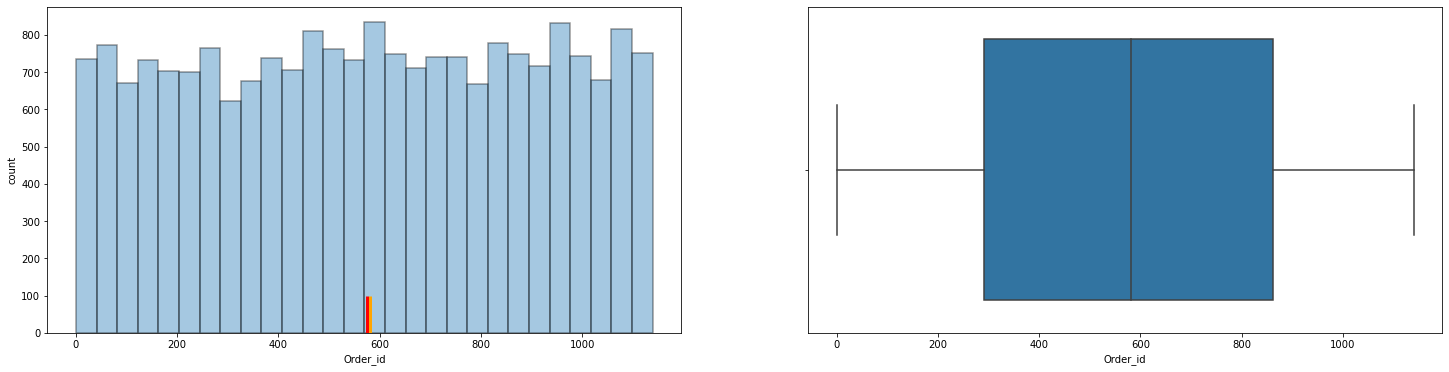

In [13]:
cont = df.select_dtypes(include = ['float64', 'int64'])
cols = list(cont.columns)
for col in cols:
    print(col)
    print('Skew:', np.round(df[col].skew(),2)) 
    plt.figure(figsize=(25,6))
    plt.subplot(1,2,1)
    sns.distplot(df[col],norm_hist=False,kde=False,hist_kws=dict(edgecolor='black',linewidth=1.5))
    plt.vlines(df[col].mean(),ymin=0, ymax=100, color = 'red', linewidth=3)
    plt.vlines(df[col].median(),ymin=0, ymax=100, color = 'orange', linewidth=3)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

In [14]:
df['Product'] = df['Product'].str.lower()
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


In [15]:
df = df.drop(df[df.Product == 'none'].index)
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


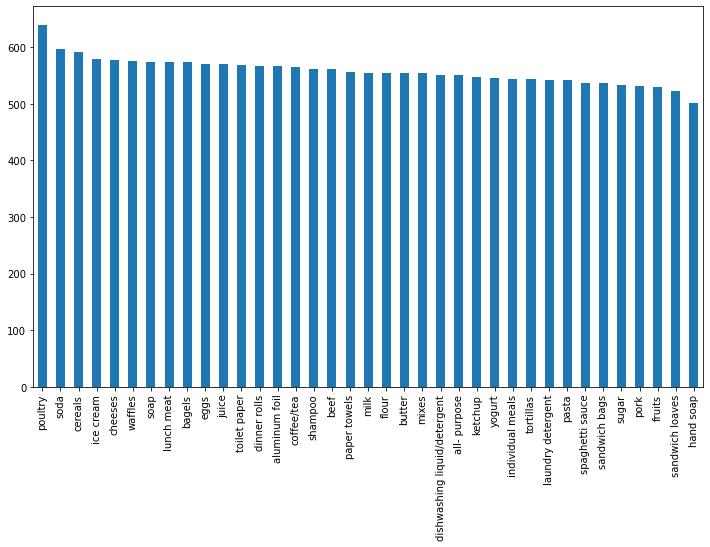

In [16]:
df['Product'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

In [17]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')
basket

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1136,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1137,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [18]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [19]:
basket=basket.applymap(encode_zero_one)

### Find the support for itemsets using Apriori

In [20]:
itemsets = apriori(basket, min_support = 0.05, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
8449,0.051800,"(poultry, spaghetti sauce, ice cream, dinner r..."
8450,0.051800,"(poultry, spaghetti sauce, juice, dinner rolls)"
8451,0.053556,"(poultry, spaghetti sauce, laundry detergent, ..."
8452,0.050044,"(dishwashing liquid/detergent, laundry deterge..."


There are 8453 combinations for frequently purchased products

### Visualizing the Support of itemsets

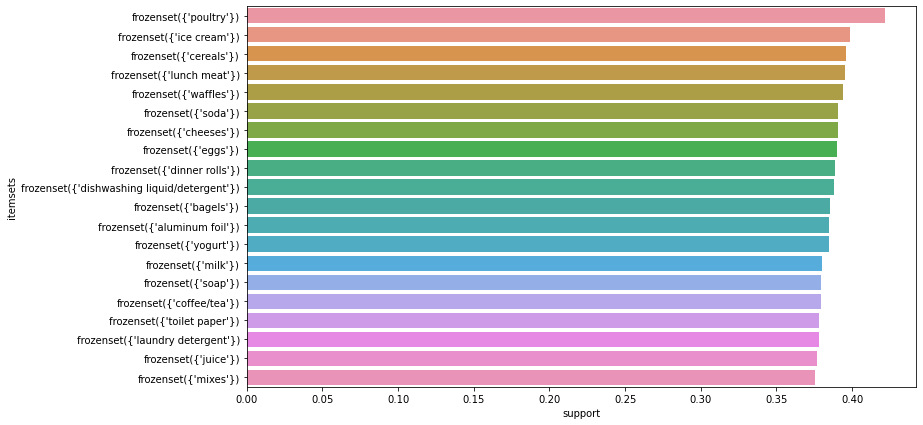

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,0],
            itemsets.sort_values('support',ascending=False).iloc[0:20,1])
plt.xticks()
plt.show()

### Check the rules using association_rules

In [22]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [23]:
basket

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47951,"(pasta, paper towels)","(eggs, ice cream)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
47950,"(eggs, ice cream)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
47952,"(pasta, ice cream)","(eggs, paper towels)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
47949,"(eggs, paper towels)","(pasta, ice cream)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
47855,"(paper towels, dinner rolls)","(eggs, pasta)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830
...,...,...,...,...,...,...,...,...,...
46756,(waffles),"(poultry, tortillas)",0.394205,0.171203,0.058824,0.149220,0.871601,-0.008666,0.974162
34220,"(fruits, ice cream)",(pork),0.165057,0.355575,0.050922,0.308511,0.867639,-0.007768,0.931938
34221,(pork),"(fruits, ice cream)",0.355575,0.165057,0.050922,0.143210,0.867639,-0.007768,0.974501
24442,(laundry detergent),"(coffee/tea, ice cream)",0.378402,0.165057,0.052678,0.139211,0.843412,-0.009780,0.969974


In [24]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47951,"(pasta, paper towels)","(eggs, ice cream)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
47950,"(eggs, ice cream)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
47952,"(pasta, ice cream)","(eggs, paper towels)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
47949,"(eggs, paper towels)","(pasta, ice cream)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
47855,"(paper towels, dinner rolls)","(eggs, pasta)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830
47850,"(eggs, pasta)","(paper towels, dinner rolls)",0.169447,0.155399,0.051800,0.305699,1.967185,0.025468,1.216477
47906,"(poultry, spaghetti sauce)","(juice, dinner rolls)",0.171203,0.157155,0.051800,0.302564,1.925254,0.024894,1.208490
47911,"(juice, dinner rolls)","(poultry, spaghetti sauce)",0.157155,0.171203,0.051800,0.329609,1.925254,0.024894,1.236289
47796,"(sandwich bags, cereals)","(cheeses, bagels)",0.158033,0.167691,0.050922,0.322222,1.921524,0.024421,1.227997
47797,"(cheeses, bagels)","(sandwich bags, cereals)",0.167691,0.158033,0.050922,0.303665,1.921524,0.024421,1.209140


In [25]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47958 entries, 47951 to 24439
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         47958 non-null  object 
 1   consequents         47958 non-null  object 
 2   antecedent support  47958 non-null  float64
 3   consequent support  47958 non-null  float64
 4   support             47958 non-null  float64
 5   confidence          47958 non-null  float64
 6   lift                47958 non-null  float64
 7   leverage            47958 non-null  float64
 8   conviction          47958 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.7+ MB
